In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from iam.added_absence_detectors import IAM, corpus

In [3]:
iam = IAM()

# Bright target/patterned mask

In [4]:
def present_mask_at(iam, position):
    patterned_mask = np.hstack((np.ones((1, 9)), np.zeros((1, 14 - 9))))
    iam.feature_layer.activations[position, :] = patterned_mask
    iam.absence_detector_layer.activations[position, :] = 1 - patterned_mask

In [5]:
def present_mask(iam):
    for position in range(4):
        present_mask_at(iam, position)

In [6]:
def present_nothing_at(iam, position):
    iam.feature_layer.activations[position, :] = np.zeros(14)
    iam.absence_detector_layer.activations[position, :] = np.zeros(14)

In [7]:
def present_letter(iam, word, position):
    iam.present_word(word)
    for j in range(4):
        if j == position:
            continue
        present_nothing_at(iam, j)

In [8]:
def run_bright_trial(iam, word, letter_position=None):
    letter_activations_history = dict(K=[], R = [], D = [], E = [])
    word_activations_history = dict(READ=[], DEAL=[])
    active_words = set()
    
    def take_snapshot():
        for letter, activation_list in letter_activations_history.items():
            activation_list.append(iam.get_letter_activation(position=1, letter=letter))
        
        for word, activation_list in word_activations_history.items():
            activation_list.append(iam.get_word_activation(word))
            
        active_words.update(corpus[iam.word_layer.activations > 0].word.tolist())
    
    n_cycles = 40
    n_stim_cycles = 15
    iam.reset_nodes()
    take_snapshot()
    
    for i in range(n_cycles):
        if i < n_stim_cycles:
            if letter_position is None:
                iam.present_word(word)
            else:
                present_letter(iam, word, letter_position)
        else:
            present_mask(iam)

        iam.run_cycle()
        take_snapshot()
    
    return letter_activations_history, word_activations_history, active_words

## Word condition 

In [9]:
letter_activations_history, word_activations_history, active_words = run_bright_trial(iam, 'READ', letter_position=None)

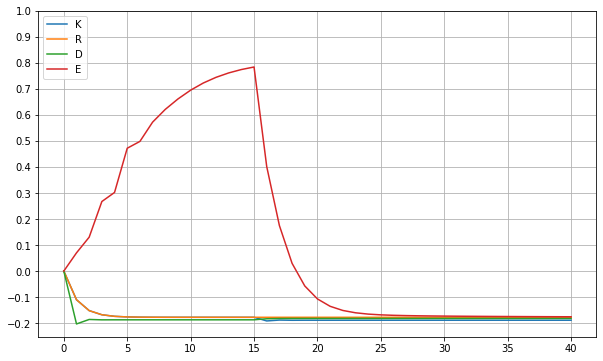

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(letter_activations_history.values())).T)
plt.legend(list(letter_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

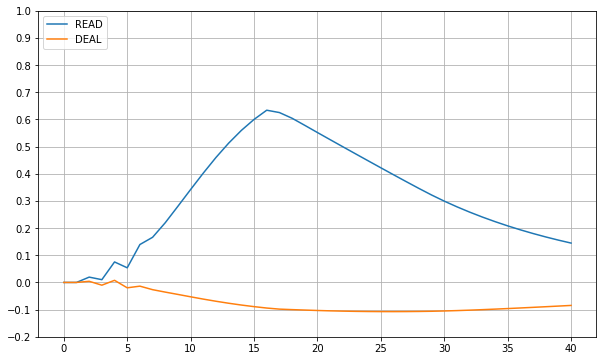

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(word_activations_history.values())).T)
plt.legend(list(word_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

In [12]:
print(active_words)

{'roam', 'deal', 'ryan', 'rear', 'roar', 'dean', 'peak', 'pear', 'send', 'jean', 'read', 'leaf', 'wear', 'hear', 'weak', 'peas', 'raid', 'reno', 'heat', 'road', 'seas', "he'd", 'dead', 'mean', 'yeah', 'deed', 'deaf', 'gear', 'load', 'lead', 'heed', 'clad', 'rebs', 'tear', 'glad', 'seed', 'lend', 'bean', 'dear', 'herd', 'near', 'seat', 'feed', 'need', 'seal', 'rest', 'beat', 'seam', 'fear', 'real', 'feat', 'meal', 'lean', 'rent', 'heap', 'team', 'tend', "we'd", 'year', 'held', 'beam', 'reef', 'zeal', 'neat', 'leap', 'bend', 'meat', 'head', 'bear', 'rely', 'reed'}


## Letter with number signs

In [13]:
letter_activations_history, word_activations_history, active_words = run_bright_trial(iam, 'READ', letter_position=1)

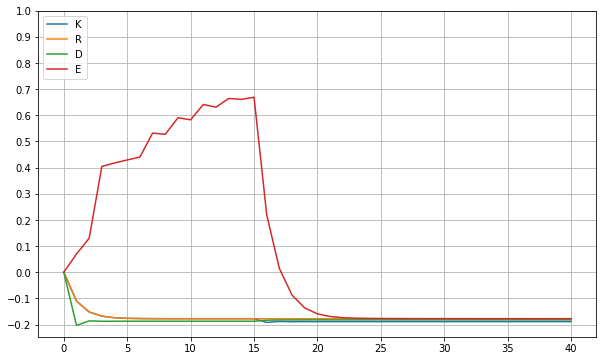

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(letter_activations_history.values())).T)
plt.legend(list(letter_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

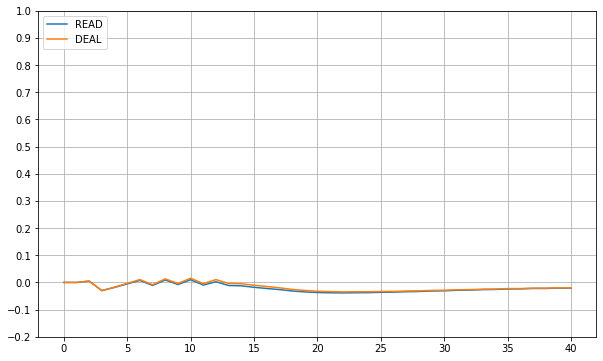

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(word_activations_history.values())).T)
plt.legend(list(word_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

In [16]:
print(active_words)

{'pets', 'dept', 'went', 'seem', 'peak', 'neon', 'peer', 'sets', 'beds', 'reno', 'zest', 'jeep', 'fees', 'nest', 'sent', 'were', 'kehl', 'west', 'deed', 'deaf', 'neck', 'heir', 'help', 'penn', 'text', 'seed', 'lend', 'next', 'peck', 'herd', 'keel', 'need', 'rest', 'kent', 'fear', 'real', 'weep', 'meal', 'veto', 'been', 'dell', 'rent', 'reef', 'neat', 'beth', 'tech', 'deer', "we'd", 'kerr', 'here', 'less', 'jean', 'leaf', 'peas', 'cent', "he's", 'news', "he'd", 'dead', 'lent', 'gear', 'best', 'lead', 'left', 'heed', 'hell', 'bern', 'cell', 'rebs', 'gene', 'jess', 'lets', 'near', 'menu', 'seal', 'seen', 'fell', 'beat', 'lest', 'seam', 'very', 'kept', 'deep', 'team', 'year', 'deny', 'bend', 'head', 'reed', 'teen', 'zero', 'deal', 'heel', 'keep', 'bees', 'feel', 'wept', 'pels', 'dean', 'pear', 'read', 'hear', 'weak', 'test', 'veil', 'heat', 'jews', 'pete', 'term', 'well', 'yeah', 'sees', 'keen', 'meek', 'deck', 'belt', 'meet', 'tear', 'bean', 'seek', 'legs', 'feat', 'mess', 'bell', 'lean',

The reason "E" got activate more strongly here than in the article is that more word were activated. In turn, more word were activated because in our model, the resting state is zero.

## Letter with number signs - negative resting state of words

In [22]:
iam_negative_resting_state = IAM()
iam_negative_resting_state.word_layer.resting_activation = -0.4

In [23]:
letter_activations_history, word_activations_history, active_words = run_bright_trial(iam_negative_resting_state, 'READ', letter_position=1)

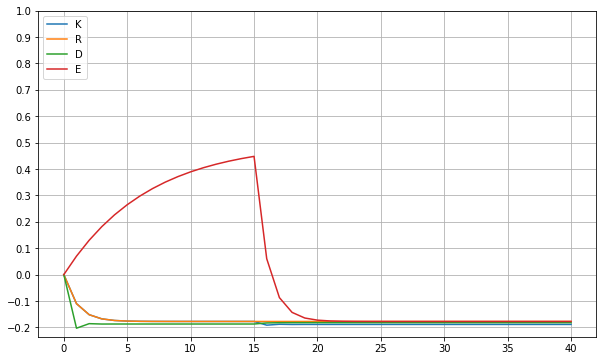

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(letter_activations_history.values())).T)
plt.legend(list(letter_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

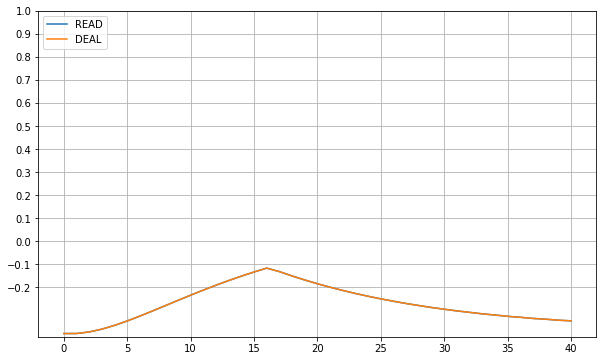

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(list(word_activations_history.values())).T)
plt.legend(list(word_activations_history.keys()), loc='upper left')
plt.grid()
plt.yticks(np.arange(-0.2, 1.1, 0.1));

In [26]:
print(active_words)

set()


We got the right pattern of activation of "E" but we had to set the resting state to -0.4. In the article, the resting state is between -0.05 and 0.